# Decision Tree Regression LAB

In [136]:
# import Liberaries
import pandas as pd

In [137]:
# reading Dataset
mydata = pd.read_csv("C:/Users/getne/Desktop/MSC/Data Science/Real-estate1.csv")

In [138]:
mydata.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [139]:
#input and out feachers predictions
#input feachres
x = mydata.drop(['X2 house age','X5 latitude'], axis=1)
y = mydata.drop(['X1 transaction date'], axis =1)

In [140]:
x.shape
y.shape

(414, 7)

In [141]:
print(x[:10])

   No  X1 transaction date  X3 distance to the nearest MRT station  \
0   1             2012.917                                84.87882   
1   2             2012.917                               306.59470   
2   3             2013.583                               561.98450   
3   4             2013.500                               561.98450   
4   5             2012.833                               390.56840   
5   6             2012.667                              2175.03000   
6   7             2012.667                               623.47310   
7   8             2013.417                               287.60250   
8   9             2013.500                              5512.03800   
9  10             2013.417                              1783.18000   

   X4 number of convenience stores  X6 longitude  Y house price of unit area  
0                               10     121.54024                        37.9  
1                                9     121.53951                       

In [142]:
#spliting data into Training and Testing Data set

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
#spliting the Data Set

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20)

In [146]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(331, 6) (83, 6) (331, 7) (83, 7)


In [147]:
#Decission Tree Regression Model
# importing the Regression
from sklearn.tree import DecisionTreeRegressor
#creating and Fiting the Models
LL_dt = DecisionTreeRegressor().fit(x_train , y_train)

In [148]:
# The Coefficent of Determinations
print('The Training r_sqr is: %.2f'%LL_dt.score(x_train, y_train))

The Training r_sqr is: 1.00


In [149]:
# Training Model Evaluation

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score
#prediction on the predctions datasets

In [151]:
ytrain_pred = LL_dt.predict(x_train)

In [152]:
# the r_sq

In [153]:
print('The r_sq is:', r2_score(y_train, ytrain_pred))

The r_sq is: 1.0


In [154]:
#Mean Absolute Error(MAE)
print('The MAE is:', mean_absolute_error(y_train, ytrain_pred))

The MAE is: 0.0


In [155]:
#MSE
print('The MSE is:', mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.0


In [156]:
#The RMSE
import numpy as np
print('The RMSE is:', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is: 0.0


In [157]:
# The Explained Variance Error
print('The EVE is:', explained_variance_score(y_train, ytrain_pred))

The EVE is: 1.0


In [158]:
#predctions on the Testing Data
ytest_pred = LL_dt.predict(x_test)

In [159]:
#The r_sq
print('The Testing r_sq is:%.2f'%r2_score(y_test, ytest_pred))

The Testing r_sq is:0.40


In [160]:
print('The Testing r_sq is:%.2f'% LL_dt.score(x_test, y_test))

The Testing r_sq is:0.40


In [161]:
#Plotting the observed and Predicted Values
import matplotlib.pyplot as plt
#setting the bounderies and paramethers
plt.rcParams['figure.figsize'] =(10,6)

In [162]:
x_ax = range(len(x_test))

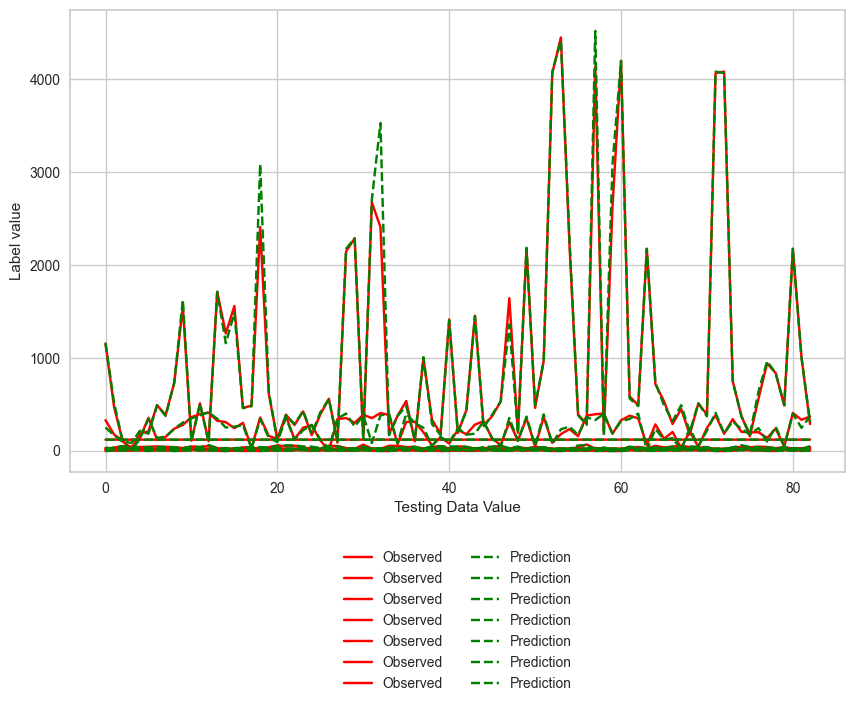

In [166]:
#plotting
plt.plot(x_ax , y_test, label ='Observed', color='red', linestyle='-')
plt.plot(x_ax , ytest_pred, label ='Prediction', color='green', linestyle='--')
plt.ylabel('Label value')
plt.xlabel('Testing Data Value')
plt.legend(bbox_to_anchor =(0.5,-0.5), loc ='lower center',ncol=2, frameon=False)

In [ ]:
#Residuals Plot
from yellowbrick.regressor import residualsPlot
visualizer = residualsPlot(LL_dt)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()